### CONFIG

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

import sys, pathlib, os
project_root = pathlib.Path.home() / "projets" / "protein-generation"
sys.path.append(str(project_root))

from scripts.models.mdlm_FL_M.mdlm_FL_M_1_utils import *
from scripts.models.mdlm_FL_M.mdlm_FL_M_2_utils import *

In [2]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

### DATA

In [3]:
protein_data = pd.read_csv('/home/arthur/projets/protein-generation/data/seq_clean_L100.csv', sep=',')
print(protein_data.head())
protein_sequences = protein_data['sequence'].tolist()

print(f"Number of protein sequences: {len(protein_sequences)}")
print(f"Set of lengths : {set([len(ps) for ps in protein_sequences])}")

                                            sequence
0  MVKYLVVLGVNIRVDNDCAIRWASLHGHLEVVKYLVSQGANIRAEN...
1  VVKYLVVLGVNIRVDNDCAIRWASLHGHLEVVKYLVSQGANIRAEN...
2  MVSQGADIRSNNDCAVRLASQNGRIEVVKYLVNLGAGIRAHNDYAV...
3  MVSQGADIRSNNDCAVRLASQNGRIEVVKYLVNLGAGIRAHNDYAV...
4  MVSQGADIRSNNDCAVRLASQNGRIEVVKYLVNLGAGIRAHNDYAV...
Number of protein sequences: 1628
Set of lengths : {100}


### PIPELINE

Training:   0%|          | 1/500 [00:01<09:28,  1.14s/it]

Epoch 0: Loss = 2.9427


Training:   2%|▏         | 11/500 [00:06<04:46,  1.71it/s]

Epoch 10: Loss = 2.8466


Training:   4%|▍         | 21/500 [00:11<04:03,  1.97it/s]

Epoch 20: Loss = 2.4898


Training:   6%|▌         | 31/500 [00:15<02:38,  2.96it/s]

Epoch 30: Loss = 2.2164


Training:   8%|▊         | 41/500 [00:20<03:52,  1.97it/s]

Epoch 40: Loss = 2.1434


Training:  10%|█         | 51/500 [00:25<03:01,  2.47it/s]

Epoch 50: Loss = 2.0607


Training:  12%|█▏        | 61/500 [00:28<02:08,  3.42it/s]

Epoch 60: Loss = 2.0321


Training:  14%|█▍        | 71/500 [00:33<04:02,  1.77it/s]

Epoch 70: Loss = 2.0017


Training:  16%|█▌        | 81/500 [00:39<04:00,  1.74it/s]

Epoch 80: Loss = 2.0062


Training:  18%|█▊        | 91/500 [00:45<04:00,  1.70it/s]

Epoch 90: Loss = 1.9077


Training:  20%|██        | 101/500 [00:50<03:35,  1.85it/s]

Epoch 100: Loss = 1.8425


Training:  22%|██▏       | 111/500 [00:56<03:47,  1.71it/s]

Epoch 110: Loss = 1.8326


Training:  24%|██▍       | 121/500 [01:00<01:55,  3.28it/s]

Epoch 120: Loss = 1.7747


Training:  26%|██▌       | 131/500 [01:03<01:44,  3.54it/s]

Epoch 130: Loss = 1.8229


Training:  28%|██▊       | 141/500 [01:06<02:02,  2.92it/s]

Epoch 140: Loss = 1.7904


Training:  30%|███       | 151/500 [01:11<01:59,  2.91it/s]

Epoch 150: Loss = 1.7505


Training:  32%|███▏      | 161/500 [01:14<01:52,  3.00it/s]

Epoch 160: Loss = 1.6989


Training:  34%|███▍      | 171/500 [01:20<03:06,  1.76it/s]

Epoch 170: Loss = 1.7058


Training:  36%|███▌      | 181/500 [01:25<03:04,  1.72it/s]

Epoch 180: Loss = 1.7208


Training:  38%|███▊      | 191/500 [01:31<02:59,  1.72it/s]

Epoch 190: Loss = 1.6709


Training:  40%|████      | 201/500 [01:37<02:52,  1.73it/s]

Epoch 200: Loss = 1.6249


Training:  42%|████▏     | 211/500 [01:43<02:48,  1.71it/s]

Epoch 210: Loss = 1.6462


Training:  44%|████▍     | 221/500 [01:49<02:43,  1.71it/s]

Epoch 220: Loss = 1.6307


Training:  46%|████▌     | 231/500 [01:54<02:35,  1.73it/s]

Epoch 230: Loss = 1.6245


Training:  48%|████▊     | 241/500 [02:00<02:29,  1.73it/s]

Epoch 240: Loss = 1.5565


Training:  50%|█████     | 251/500 [02:06<02:25,  1.71it/s]

Epoch 250: Loss = 1.6001


Training:  52%|█████▏    | 261/500 [02:12<02:19,  1.71it/s]

Epoch 260: Loss = 1.5338


Training:  54%|█████▍    | 271/500 [02:18<02:12,  1.72it/s]

Epoch 270: Loss = 1.5459


Training:  56%|█████▌    | 281/500 [02:23<02:07,  1.72it/s]

Epoch 280: Loss = 1.6087


Training:  58%|█████▊    | 291/500 [02:29<02:00,  1.73it/s]

Epoch 290: Loss = 1.4696


Training:  60%|██████    | 301/500 [02:34<01:42,  1.95it/s]

Epoch 300: Loss = 1.5531


Training:  62%|██████▏   | 311/500 [02:40<01:49,  1.73it/s]

Epoch 310: Loss = 1.5230


Training:  64%|██████▍   | 321/500 [02:44<01:30,  1.97it/s]

Epoch 320: Loss = 1.5388


Training:  66%|██████▌   | 331/500 [02:49<01:19,  2.13it/s]

Epoch 330: Loss = 1.5461


Training:  68%|██████▊   | 341/500 [02:54<01:24,  1.89it/s]

Epoch 340: Loss = 1.5538


Training:  70%|███████   | 351/500 [03:00<01:27,  1.71it/s]

Epoch 350: Loss = 1.4402


Training:  72%|███████▏  | 361/500 [03:05<01:20,  1.72it/s]

Epoch 360: Loss = 1.4975


Training:  74%|███████▍  | 371/500 [03:11<01:15,  1.72it/s]

Epoch 370: Loss = 1.4312


Training:  76%|███████▌  | 381/500 [03:17<01:09,  1.72it/s]

Epoch 380: Loss = 1.4718


Training:  78%|███████▊  | 391/500 [03:23<01:03,  1.72it/s]

Epoch 390: Loss = 1.4231


Training:  80%|████████  | 401/500 [03:28<00:40,  2.46it/s]

Epoch 400: Loss = 1.5060


Training:  82%|████████▏ | 411/500 [03:32<00:48,  1.83it/s]

Epoch 410: Loss = 1.4622


Training:  84%|████████▍ | 421/500 [03:38<00:45,  1.73it/s]

Epoch 420: Loss = 1.4422


Training:  86%|████████▌ | 431/500 [03:44<00:40,  1.72it/s]

Epoch 430: Loss = 1.4399


Training:  88%|████████▊ | 441/500 [03:50<00:34,  1.72it/s]

Epoch 440: Loss = 1.3376


Training:  90%|█████████ | 451/500 [03:56<00:28,  1.73it/s]

Epoch 450: Loss = 1.3862


Training:  92%|█████████▏| 461/500 [04:01<00:22,  1.74it/s]

Epoch 460: Loss = 1.3927


Training:  94%|█████████▍| 471/500 [04:07<00:16,  1.73it/s]

Epoch 470: Loss = 1.3797


Training:  96%|█████████▌| 481/500 [04:13<00:11,  1.73it/s]

Epoch 480: Loss = 1.4673


Training:  98%|█████████▊| 491/500 [04:19<00:05,  1.72it/s]

Epoch 490: Loss = 1.4440


Training: 100%|██████████| 500/500 [04:23<00:00,  1.90it/s]

2. Visualisation des losses...


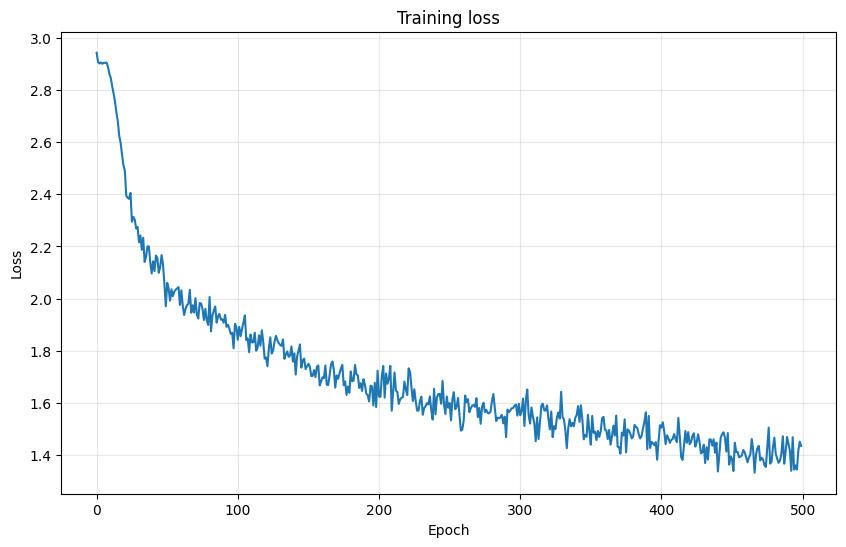

In [4]:
ns = NoiseSchedule("cosine")

model, losses = train_pipeline(
    sequences=protein_sequences[:1000], 
    seq_length=100,
    batch_size=64,
    n_epochs=500,
    lr=1e-3,
    d_model=128,
    n_heads=8,
    n_layers=6,
    dropout=0.1,
    noise_schedule=ns,
    device="cuda"
)

print("2. Visualisation des losses...")
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.show()

In [5]:

print("3. Génération de séquences...")
generated = generate_pipeline(
    model=model,
    seq_length=100,
    noise_schedule=ns,
    n_samples=1000
)

print("4. Résultats :")
for i, seq in enumerate(generated, 1):
    print(f"Séquence {i}: {seq[:50]}…") 
    
    
print("3. Génération de séquences...")
generated_conf = generate_pipeline_confidence(
    model=model,
    seq_length=100,
    noise_schedule=ns,
    n_samples=1000
)

print("4. Résultats :")
for i, seq in enumerate(generated_conf, 1):
    print(f"Séquence {i}: {seq[:50]}…") 


3. Génération de séquences...


4. Résultats :
Séquence 1: MPVDDHKPNDVLDSLIPELNKETSPYLDAAGRAAPLIVHYGACYYRKTIN…
Séquence 2: MKTTFTIFKTTTDKPILHANDDVEAKTRWDIPFSPGSMSKEQELEGQRTA…
Séquence 3: MIYQEASFDAISRVDWPKGMPDLAYDPGYCDPELRVLGTRTDWGAAPACS…
Séquence 4: MINYVRTMAHGAAAEVYELLGKINLEWRGDPVGEPLTPVPTIWKASYSLP…
Séquence 5: MGADQPGVECIEEYDFANFGMAELSAQIVNMVIDSNFTHTVVIDNEDEAF…
Séquence 6: MLLVRIPIQDLNKIHHLKVDDREGATTHRLPAPLRQTTAIAHTEKIATFV…
Séquence 7: MDLFKEVLFNLEALDDKVLGNLALGHLGYRDWLGLTNVAFLYIVKGITSI…
Séquence 8: MENVHTESAAKETVLPLMSIAVGLKLEYGKPKEIKISQHRWEPSRYLKAE…
Séquence 9: MDKQVQDHRVFFKVERLAATTVAAGNNVKPEAAYGDEFIKTVLENIWTVS…
Séquence 10: MEPLEKVSTAVIEEPAGFNGNQDVGLHKFLMIVDTLSTAKGGRVLGMNDT…
Séquence 11: MTKCLLARMAEAGIDGTPAAGIGYPVGLIHRLGDQPQWLYSRVTAIQANG…
Séquence 12: MDEGSEDEIRKEKLEFVYMYGATELVLATSSNPKKKELAGAAQLRRKMVK…
Séquence 13: MILNDSSLINPKDDIRKKGKGTIYKEFTPERIQPSSMTYRVGLAKKEALV…
Séquence 14: MANYYEAKENQRLADISRYSMRREKRKWRGSLAPRVCRWRVTTAREEVAA…
Séquence 15: MNLLKPALMVIGTDVEINDQLKVEAYAHKIVRIKPHVIIGAEQADIGPVR…
Séquence 16: MHIIKR

In [6]:
df_gen = pd.DataFrame({'sequence': generated})

df_gen.to_csv('/home/arthur/projets/protein-generation/experiments/mdlm_FL_M_1/gen2.csv', index=False)

df_gen_conf = pd.DataFrame({'sequence': generated_conf})

df_gen_conf.to_csv('/home/arthur/projets/protein-generation/experiments/mdlm_FL_M_2/gen2conf.csv', index=False)